In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
plt.style.use("seaborn")
#loading the data 
df = pd.read_csv(r"EOD-NKE.csv")

In [3]:
print(df.head())

         Date   Open   High    Low  Close      Volume  Dividend  Split  \
0  2017-12-28  63.00  63.32  62.85  62.95   3987151.0       0.0    1.0   
1  2017-12-27  63.56  63.60  62.77  62.95   8959745.0       0.0    1.0   
2  2017-12-26  62.90  63.89  62.81  63.65   4563475.0       0.0    1.0   
3  2017-12-22  61.21  63.54  60.13  63.29  20413895.0       0.0    1.0   
4  2017-12-21  64.33  64.98  63.30  64.77  14312589.0       0.0    1.0   

    Adj_Open   Adj_High    Adj_Low  Adj_Close  Adj_Volume  
0  61.192172  61.502990  61.046477  61.143607   3987151.0  
1  61.736103  61.774955  60.968772  61.143607   8959745.0  
2  61.095042  62.056633  61.007625  61.823520   4563475.0  
3  59.453538  61.716677  58.404529  61.473851  20413895.0  
4  62.484007  63.115355  61.483564  62.911381  14312589.0  


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,75.404096,76.000458,74.788281,75.416490,6.535514e+06,0.003486,1.000917,48.053975,48.445290,47.660151,48.066513,8.548742e+06
std,22.666006,22.805417,22.437989,22.636137,4.638944e+06,0.028420,0.030289,8.655830,8.747738,8.551783,8.658056,4.687449e+06
min,49.240000,50.000000,49.010000,49.620000,1.220605e+06,0.000000,1.000000,29.358296,29.953677,29.307527,29.672140,2.441210e+06
25%,56.005000,56.500000,55.633750,56.052500,3.178350e+06,0.000000,1.000000,40.579548,40.882119,40.010621,40.689361,5.936417e+06
50%,72.305000,72.965000,71.740000,72.400000,5.304524e+06,0.000000,1.000000,50.344530,50.677305,49.873544,50.316412,7.501468e+06
75%,93.395000,94.102500,92.604575,93.332500,8.495554e+06,0.000000,1.000000,54.270148,54.696704,53.865728,54.324873,9.392706e+06
max,136.240000,136.390000,133.331000,134.330000,4.653723e+07,0.320000,2.000000,64.525911,64.596954,62.994973,63.466971,5.729632e+07


In [5]:
x = df[['High', 'Low','Open','Volume']].values
y = df['Close'].values

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [7]:
regressor =  LinearRegression()

In [8]:
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
print(regressor.coef_)

[ 8.45213363e-01  7.69786426e-01 -6.13616038e-01  6.95769697e-09]


In [10]:
print(regressor.intercept_)

-0.1716635108408724


In [11]:
predict = regressor.predict(x_test)

In [12]:
print(predict)

[130.81566287  53.68935403  88.62992204  52.01221414  60.89080904
  53.96383967  59.26291185 100.94305346  56.49540936  51.84351613
 103.73087626 122.34578246  52.24449031  75.737757    68.58241075
 102.83077037  53.63584362 131.95746944  55.27824987  58.4796479
 125.31012494  56.48425061  77.83107347  78.49446293  62.04990444
  52.66461329 100.009183    95.24880714  52.38025385  73.8011459
  99.38830526  54.91117214  78.26945477  87.84389293 110.03143174
 112.09176988  55.99488452 126.65797596 111.69645687 110.85381739
  52.79056712  53.06534718  96.74066313  77.63534185  55.46638775
  89.81046372  66.33419746  96.51770596  55.78714523  97.34484931
  74.193315    50.60504759 130.6083529   58.51140055  56.7485634
  71.22330222  81.33035236  96.94095422  53.64927583  54.93587609
  54.39601729  96.90939205  60.66630297  59.37613627  85.74773603
  56.01421259  77.39409961  74.099634    63.13644186  78.75816234
  53.19411419 126.16560122  62.86895688 110.27784127  99.99673847
  59.502414  

In [13]:
dframe = pd.DataFrame({"Actual" : y_test.flatten() , 'Predicted' : predict.flatten()})

In [14]:
dframe.head(25)

,Actual,Predicted
0,131.12,130.815663
1,53.88,53.689354
2,88.07,88.629922
3,51.97,52.012214
4,60.70,60.890809
5,53.73,53.963840
6,59.19,59.262912
7,100.95,100.943053
8,56.59,56.495409
9,51.79,51.843516


In [15]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,predict))
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,predict))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,predict)))

Mean Absolute Error :  0.26266148800829764
Mean Squared Error :  0.13721619914673752
Root Mean Squared Error :  0.37042704969634377


In [16]:
graph = dframe.head(20)

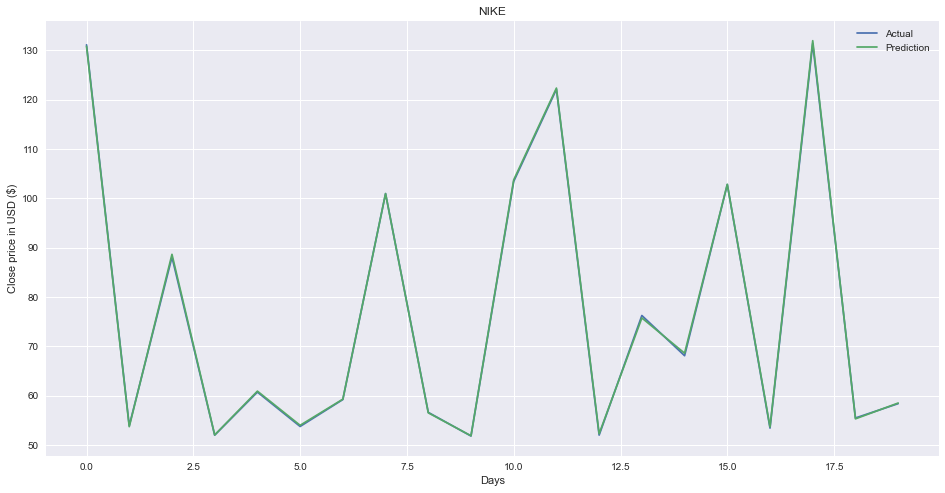

In [17]:
#visualising the dataset
plt.figure(figsize=(16,8))
plt.title("NIKE")
plt.xlabel('Days')
plt.ylabel('Close price in USD ($)')
plt.plot( graph)
plt.legend(['Actual','Prediction'])
plt.show()

In [18]:
plt.savefig("Nike.png")

<Figure size 576x396 with 0 Axes>